# Practical Statistics for Data Scientists

source : https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

This notebook is a summary of the key points to be extracted from the Book **Practical Statistics for Data Scientists** by Peter Bruce, Andrew Bruce and Peter Gedeck

I will gather the most important concepts as well as python codes that can constitute strong basis for future structured analysis. I will also put some standard concepts as a quick reminder and others that might seem simple but that I am not familiar with.

In [1]:
#Imports
import numpy as np
import pandas as pd

from scipy.stats import trim_mean
import wquantiles

from statsmodels import robust

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# makes path easy
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [41]:
# file load
STATE_CSV = DATA / 'state.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'

## 1. Estimates of Location

In [4]:
state = pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
#mean
state['Population'].mean()

6162876.3

* **Trim mean** : This is the mean of the dataset after the smallest 10% and largest 10% of values have been removed from the dataset. (Moyenne tronquée)

In [6]:
#trim_mean
trim_mean(state['Population'],0.1)

4783697.125

In [7]:
#median
state['Population'].median()

4436369.5

* **Weighted Mean** : (Moyenne Pondérée)

In [8]:
#normal mean
state['Murder.Rate'].mean()

4.066

In [9]:
#Weighted mean
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

* **Weighted Median** : (Mediane Pondérée)

In [10]:
wquantiles.median(state['Murder.Rate'],weights=state['Population'])

4.4

! **Median** and **Weighted Median** are considered **Robust estimates** cause they are less afflicted by outliers

## 2. Estimates of Variability

**Variability**, also known as **dispersion** refers to how spread the data is. It gives an indication on how much data varies within the set (diverse data).

**Deviation from the mean** are the differences between the observation and the mean. Which gives how far the data is from the mean.

* **Mean absolute Deviation** : average of the absolute values of the deviations from the mean

In [11]:
state['Population'].mad()

4450933.356000001

* **Variance** : gives an idea of how spread the dataset is. A small number means the dataset is tightly clustered, a large number means the values are more spread apart.

In [12]:
np.var(state['Population'])

45960360825926.56

* **Standard deviation** : tells how tightly data is clustered around the mean. small SD data is tightly clustered (taller bell curve), large SD data is more spread apart 

In [13]:
state['Population'].std()

6848235.347401142

! **MAD, Variance** and **SD** are NOT robust to outliers

* **Median Absolute Deviation** : Median of the difference of each observation to the median. It is a robust estimate

In [14]:
robust.scale.mad(state['Population'])

3849876.1459979336

## 3. Estimates based on Percentile

The 50th percentile is the median

* **IQR** : Common measurement of Variability is the difference between the 25th and 75th percentile called the **Inter Quartile Range**

In [15]:
np.percentile(state['Population'],75) - np.percentile(state['Population'],25)

4847308.0

OR

In [16]:
from scipy.stats import iqr

iqr(state['Population'])

4847308.0

## 4. Percentiles and Boxplots

In [17]:
state['Population'].quantile([0.25,0.5, 0.75, 1])

0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
1.00    37253956.00
Name: Population, dtype: float64

* **Boxplot**

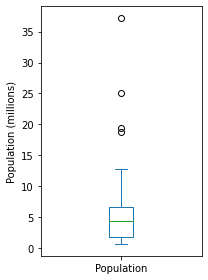

In [18]:
ax = (state['Population']/1000000).plot.box(figsize=(3,4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

- Bottom of the box : 25th percentile
- Top of the box : 75th percentile
- Box : IQR
- line in the box : median
- whiskers outside of the IQR : bulk of the data
- Bottom Whisker : min obs
- Top Whisker : max obs
- points outside of the whiskers : outliers

## 5. Frequency Tables and histograms

* **Frequency table** divides variable range into equally spaced segments and tells us how many values fall within each segment. Creates equal sized bins

In [19]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [20]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state,binnedPopulation],axis=1)

df.sort_values(by='Population',inplace=True)
df.head()

,State,Population,Murder.Rate,Abbreviation,binnedPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"


In [21]:
groups = []

#group  : returns binnedPopulation cell
#subset : returns the dataframe with the same binnedPopulation

for group, subset in df.groupby(by='binnedPopulation'):
    
    groups.append({
        'BinRange':group,
        'Count':len(subset),
        'States':','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


* **Histogram** : way to visualize frequency table with bins on the x-axis.

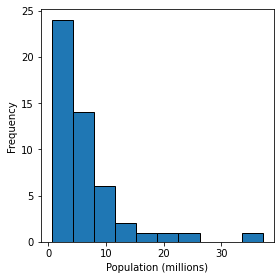

In [22]:
ax = (state['Population']/1000000).plot.hist(figsize=(4,4),edgecolor='black',linewidth=1)
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

## 6. Density Plots and estimate

* **Density plot** : shows the distribution of data values as a continuous line.

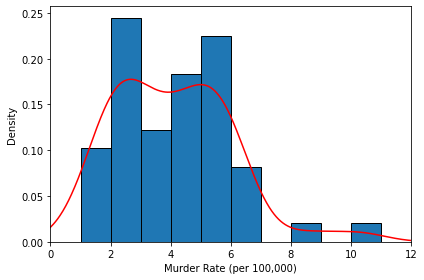

In [23]:
# histogram
ax = state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12),linewidth=1,edgecolor='black')
# density (density=True prepares to take an additional plot on the same ax)
state['Murder.Rate'].plot.density(ax=ax,color='red')
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

## 7. Exploring binary and categorical data

In [24]:
# percentage of delays by cuase
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
100*dfw/dfw.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


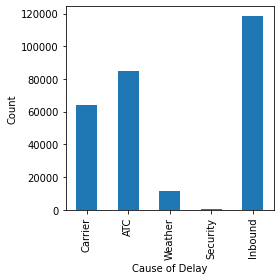

In [25]:
# bar charts
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

* **Mode** : is the value that appears the most often in the data. (in this cas it's gonna be Inbound)

* **Expected Value** : Return you can take for some kind of action.

$E_(x) = \Sigma (x * P(x) )$

p1 : 300 USD/month  
p2 : 50 USD/month  

We figure out that 5% of the attendees of the webinar will sign up for p1, 15% will sign up for p2 and 80% won't sign up at all. Which gives that the expected value for the webinar attendees is :


In [26]:
ev = 0.05*300 + 0.15*50 + .80*0
ev

22.5

## 8. Correlation

* **Correlation** : denotes association between 2 quantitative variables. 

* **Correlation coefficient** : gives an estimate of the correlation between 2 variables.
- 1 indicates strong positive correlation
- 0 indicates no relation at all
- -1 indicates strong negative correlation

In [27]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [28]:
# retrieve telecom company symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01',telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [29]:
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


Funds traded on major exchanges (ETF)

In [30]:
etfs = sp500_px.loc[sp500_px.index>'2012-07-01',sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


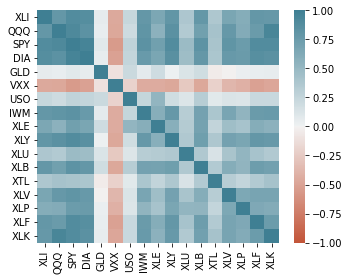

In [31]:
# plotting the result using seaborn
fig,ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(etfs.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,as_cmap=True),ax=ax)

plt.tight_layout()
plt.show()

Same plot using ellipses for the strength of the correlation

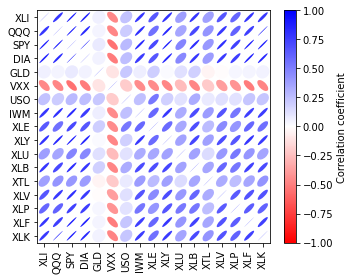

In [32]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

! **correlation coefficient** is sensitive to outliers in the data.

## 9. Scatter plot

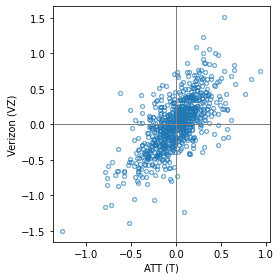

In [33]:
ax = telecom.plot.scatter(x='T',y='VZ',figsize=(4,4),marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')

#draws a horizontal line at y=0
ax.axhline(0,color='grey',lw=1)
#draws a vertical line at x=0
ax.axvline(0,color='grey',lw=1)

plt.tight_layout()
plt.show()


## 10. Exploring 2 or more variables

In [36]:
#extirping too small or too large data
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000)&
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500),:]
kc_tax0.shape

(432693, 3)

### Hexagonal binning and Contours (Plotting Numeric VS Numeric data

Scatterplot are onlymeaningful with a small set of data. Exceeding a certain number it becomes too dense to make sense.  
That's where we introduce the **Hexagonal binning**  
That will avoid visualizing a dark unreadable cloud.

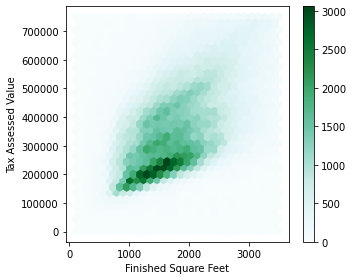

In [37]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue',gridsize=30,sharex=False,figsize=(5, 4))

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

* **KDEPlot** : Extension of thedensity plot

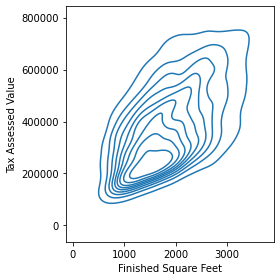

In [38]:
fig, ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data=kc_tax0.sample(10000),x='SqFtTotLiving',y='TaxAssessedValue',ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### Two Categorical Variables

In [39]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

* **Contingency Table** : (cross tabulation,cross tab) is a tabular representation of categorical data. Table of counts by category.

In [40]:
# margins add cols and rows sum
crosstab = lc_loans.pivot_table(index='grade',columns='status',aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


### Categorical and Numerical data

In [42]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


**Boxplots** can be used to visually compare the ditributions of numeric variable grouped according to a categorical variable.

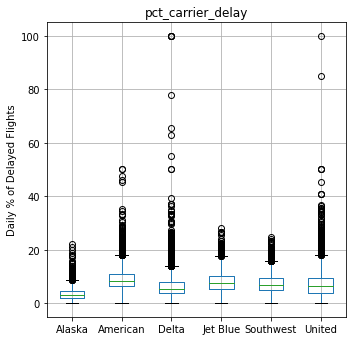

In [43]:
ax = airline_stats.boxplot(by='airline',column='pct_carrier_delay',figsize=(5,5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

* **Violin plot** : is an enhancement to the boxplot and plots the density estimate. It can add nuances that don't show in the boxplot.

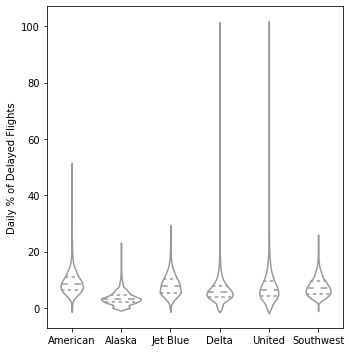

In [47]:
fig, ax = plt.subplots(figsize=(5,5))
sns.violinplot(data=airline_stats,x='airline',y='pct_carrier_delay',ax=ax,inner='quartile',color='white')

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()